<a href="https://colab.research.google.com/github/Obaidsajjad/Machine-Learnings/blob/main/SpamDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMAILS / SMS Spam Detection**

Author : Obaid Sajjad <br>
Email: obaidsajjad321@gmail.com
- [Linked In](https://linkedin.com/in/obaid-sajjad)
- [Kaggle](https://www.kaggle.com/obaidsajjad321) <br>

Dataset :  [SMS Spam Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

This project successfully developed a spam email classifier using Python's text classification techniques. Through meticulous implementation and evaluation, we identified the Multi Naive Bayes algorithm as the optimal choice for spam classification, demonstrating exceptional precision and accuracy. This classifier holds significant potential for enhancing email security and efficiency in real-world applications. Further enhancements and optimizations could be explored to continuously improve the classifier's performance and adaptability to evolving spam email patterns.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('spam.csv',encoding='latin1')
dfs=pd.
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.isnull().sum()*100/df.shape[0]

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [ ]:
print(df.shape)
df.head()

(5572, 2)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns={'v1':'target','v2':'emails'},inplace=True)
df.head()

,target,emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Converting target from categorical to numeric
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,emails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape
df.head()

,target,emails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


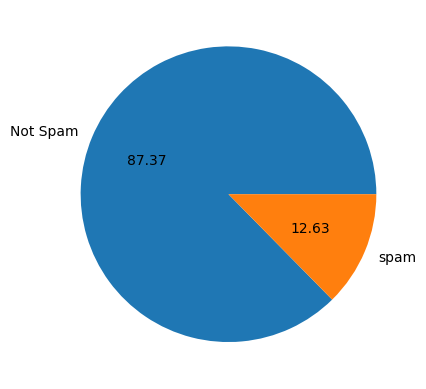

In [ ]:
plt.pie(df['target'].value_counts(),labels=['Not Spam','spam'],autopct="%0.2f")
plt.show()

- spam emails= 12.63 %
- non spam emails= 87.37 %

# Text Preprocessing

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['character_count']=df['emails'].apply(len)
df.head()

,target,emails,character_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#we have to ocunt no of words and sentences
df['word_count']=df['emails'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,emails,character_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#we have to ocunt no of words and sentences
df['sentence_count']=df['emails'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,emails,character_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.tail(10)

,target,emails,character_count,word_count,sentence_count
5562,0,Ok lor... Sony ericsson salesman... I ask shuh...,96,21,2
5563,0,Ard 6 like dat lor.,19,6,1
5564,0,Why don't you wait 'til at least wednesday to ...,67,16,1
5565,0,Huh y lei...,12,4,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1
5571,0,Rofl. Its true to its name,26,7,2


In [ ]:
df[['character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==0][[ 'character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==1][[ 'character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Text(0.5, 1.0, 'Spam and non-spam Character count comparison')

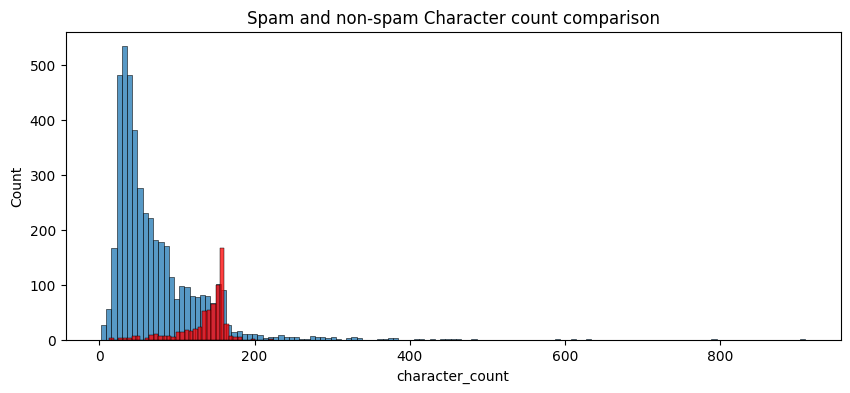

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['target']==0]['character_count'])
sns.histplot(df[df['target']==1]['character_count'],color='red')
plt.title("Spam and non-spam Character count comparison")

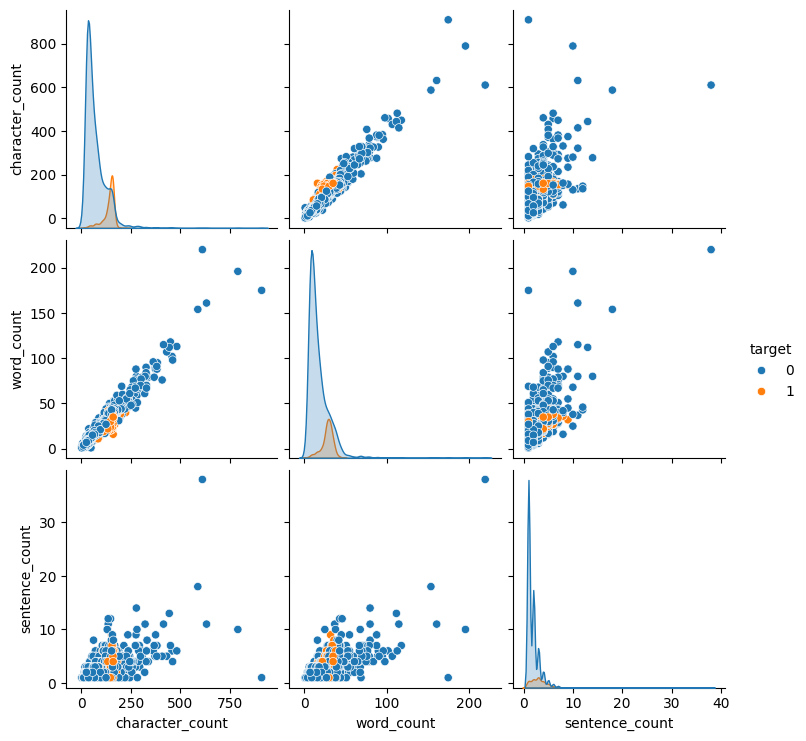

In [ ]:
sns.pairplot(df,hue='target')
plt.show()

<Axes: >

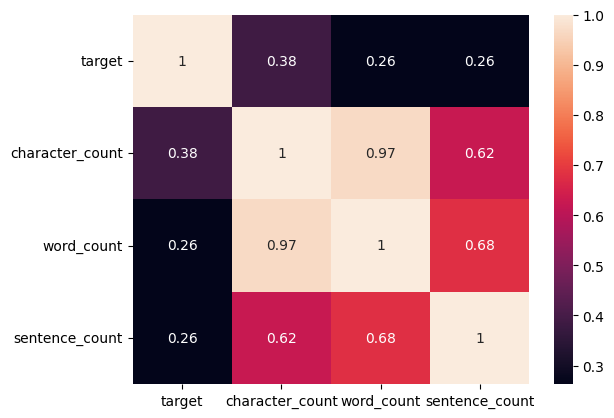

In [ ]:
for_map=df.drop('emails',axis=1)
sns.heatmap(for_map.corr(),annot=True)

#Steps to handle email text
---
1. Lower Case
2. Word Tokenization
3. Remove Special Character
4. Remove Stopwords and puntuation
5. Stemming

In [ ]:
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# ps.stem('dancing')

In [ ]:
def clean_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
df['processed_text']=df['emails'].apply(clean_text)
df.head()

,target,emails,character_count,word_count,sentence_count,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

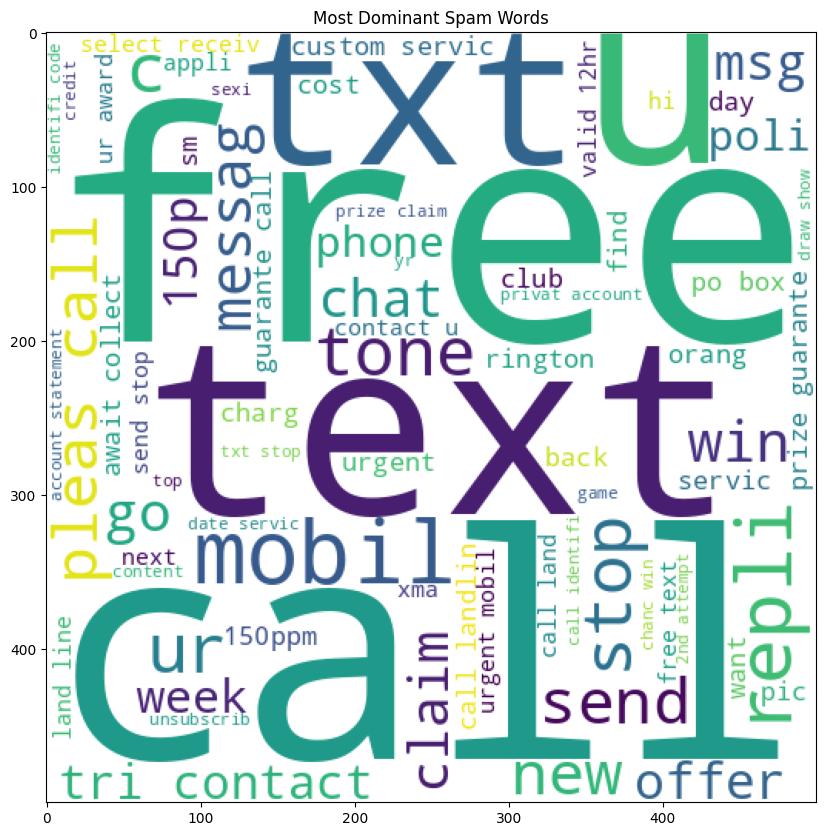

In [ ]:
#word cloud showing important words in spam messages
spam_words=wc.generate(df[df['target']==1]['processed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,10))
plt.title("Most Dominant Spam Words")
plt.imshow(spam_words)

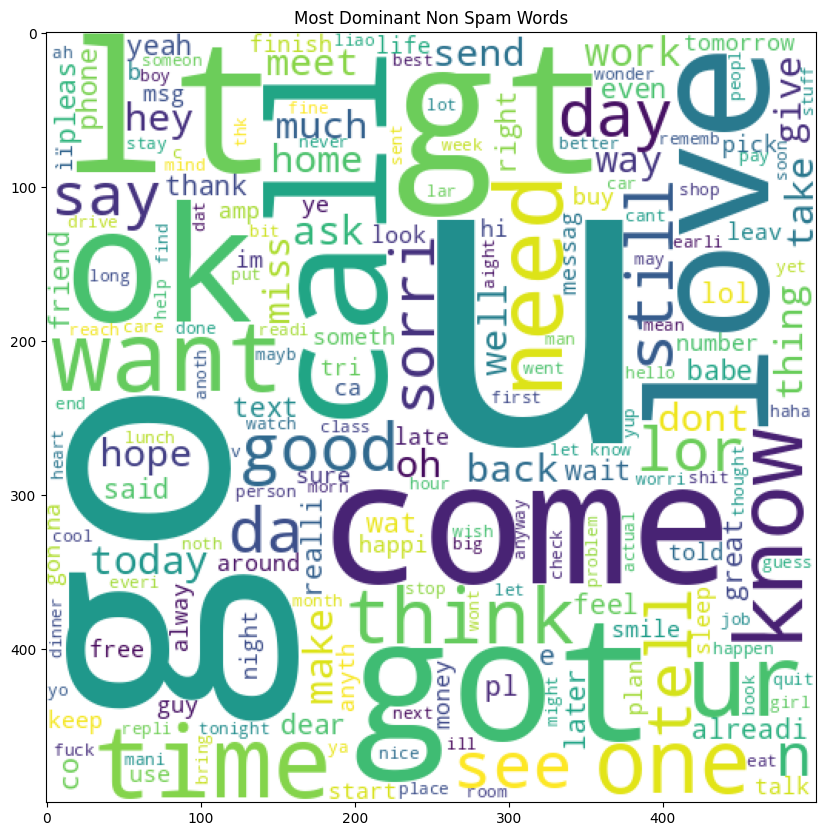

In [ ]:
#word cloud showing important words in non-spam messages
nonSpam_words=wc.generate(df[df['target']==0]['processed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,10))
plt.title("Most Dominant Non Spam Words")
plt.imshow(nonSpam_words)

In [ ]:
spam_text=[]
for email in df[df['target']==1]['processed_text'].tolist():
  for word in email.split():
    spam_text.append(word)

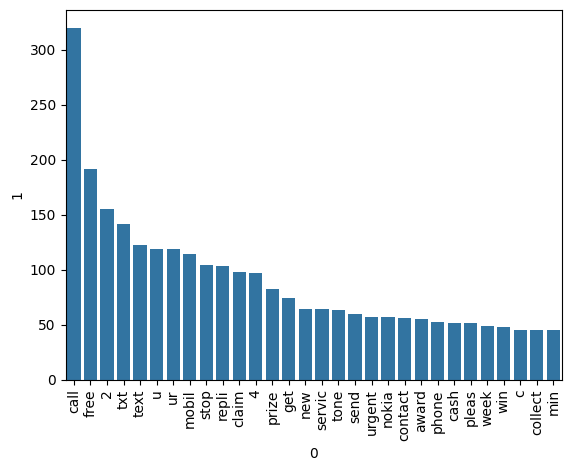

In [ ]:
#Graph showing most repeated words in Spam Emails
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_text).most_common(30))[0],y=pd.DataFrame(Counter(spam_text).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
nonspam_text=[]
for email in df[df['target']==0]['processed_text'].tolist():
  for word in email.split():
    nonspam_text.append(word)

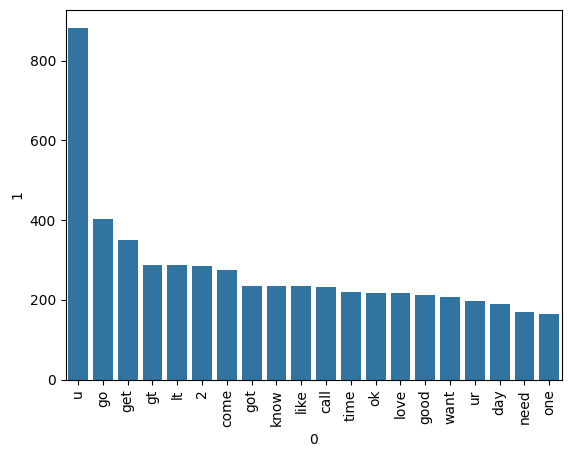

In [ ]:
#Graph showing most repeated words in Spam Emails
sns.barplot(x=pd.DataFrame(Counter(nonspam_text).most_common(20))[0],y=pd.DataFrame(Counter(nonspam_text).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Selection

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer(max_features=3000)

In [ ]:
X=tf.fit_transform(df['processed_text']).toarray()
y=df['target']

print(X.shape , y.shape)

(5169, 3000) (5169,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
xgb=XGBClassifier()

In [ ]:
classifier={
    'GaussianNB':gnb,
    'MultinomialNB':mnb,
    'BernoulliNB':bnb,
    'DecisionTreeClassifier':dtc,
    'RandomForestClassifier':rfc,
    'AdaBoostClassifier':abc,
    'BaggingClassifier':bc,
    'XGBClassifier':xgb
}

In [ ]:
def train_pred(clfr,X_train,X_test,y_train,y_test):
  clfr.fit(X_train,y_train)
  y_pred=clfr.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  confusion=confusion_matrix(y_test,y_pred)
  return accuracy,precision,confusion

In [ ]:
accuracys=[]
precisions=[]

for name,clf in classifier.items():
  accuracy,precision,confusion=train_pred(clf,X_train,X_test,y_train,y_test)
  print('-'*50)
  print(name)
  print(f'Accuracy  {accuracy}')
  print(f'Precision {precision}')
  print('Confusion Matrix\n',confusion)
  print('\n')
  print('-'*50)
  print('\n\n')

  accuracys.append(accuracy)
  precisions.append(precision)


--------------------------------------------------
GaussianNB
Accuracy  0.8736299161831077
Precision 0.5344827586206896
Confusion Matrix
 [[1169  162]
 [  34  186]]


--------------------------------------------------



--------------------------------------------------
MultinomialNB
Accuracy  0.9716312056737588
Precision 0.9888888888888889
Confusion Matrix
 [[1329    2]
 [  42  178]]


--------------------------------------------------



--------------------------------------------------
BernoulliNB
Accuracy  0.9742101869761445
Precision 0.9639175257731959
Confusion Matrix
 [[1324    7]
 [  33  187]]


--------------------------------------------------



--------------------------------------------------
DecisionTreeClassifier
Accuracy  0.9529335912314636
Precision 0.832579185520362
Confusion Matrix
 [[1294   37]
 [  36  184]]


--------------------------------------------------



--------------------------------------------------
RandomForestClassifier
Accuracy  0.969052224371373

In [ ]:
pip install nbconvert

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
